# MACHINE LEARNING TECHNIQUES IN FINANCE

## <u><i>Introduction</i></u>
<p>From its conception, <strong><i>Finance</i></strong> has been a data-driven industry. Financial institutions gather large amounts of data that provide them with important insights, and in recent years, <strong><i>Machine Learning</i></strong> has become an increasingly important tool for making sense of that data. Since these algorithms make quick and fairly accurate decisions, they are used for various purposes, such as fraud detection and prevention, portfolio management, stock price predictions and so on.</p>
<p>It is common knowledge that <strong><i>Machine Learning</i></strong> is primarily divided into two categories:   
<ul>
    <li><strong><i>Unsupervised Machine Learning</i></strong>, and</li>
    <li><strong><i>Supervised Machine Learning</i></strong>.</li>
</ul></p>
<p>Let us now give an example for each of these two categories and use some of their most reputable algorithms.</p>

## <i><u>Section 1: Unsupervised Machine Learning</u></i>.
<p><i><strong>Unsupervised Machine Learning</strong></i> is a process that seeks a grouping of data (if it exists) into an unknown number of classes from a given dataset.</p>
<p>The goal of such algorithms is to identify latent groupings of observations, which allow us to predict the class of observations even without a labelled response vector. There are many clustering algorithms and they have a plethora of approaches to identifying the clusters in data.</p>

### <u><i>Our Example:</i></u> 
<p>It is said that companies from the same industry behave similarly in their daily stock movements, as they are affected in an analogous way by market forces. Thus what we would logically expect is, for instance, to see stocks like Microsoft (<i>MSFT</i>) and Apple (<i>AAPL</i>) to be clustered in the same group. So what we want, is to create such algorithms that will aggregate companies into reasonably separated clusters, based on their daily stock movements.</p>
<p>Let us take the following 21 stocks from the stock market:</p>
<ul>
    <li> From the <strong>Technological Sector</strong>: Amazon (<i>AMZN</i>), Tesla (<i>TSLA</i>), Advanced Micro Devices (<i>AMD</i>), NVIDIA (<i>NVDA</i>), Microsoft (<i>MSFT</i>) and Apple (<i>AAPL</i>).</li>
    <li> From the <strong>Financial Services Sector</strong>: Morningstar (<i>MORN</i>), S&P Global (<i>SPGI</i>), Moody's (<i>MCO</i>), Nasdaq (<i>NDAQ</i>) and MSCI (<i>MSCI</i>).</li>
    <li> From the <strong>Automotive Sector</strong>: Toyota (<i>TM</i>), Honda (<i>HMC</i>), Blue Bird (<i>BLBD</i>), Ford Motor Company (<i>F</i>) and General Motors Company (<i>GM</i>).</li>
    <li> From the <strong>Pharmaceutical Sector</strong>: Pfizer (<i>PFE</i>), GlaxoSmithKlyne (<i>GSK</i>), Astrazeneca PLC (<i>AZN</i>), Amgen (<i>AMGN</i>) and Abbvie (<i>ABBV</i>).</li>
</ul>
<p>It should be mentioned that this distinction of the 21 stocks into these four categories will be unknown in this example. This is a measuring stick, to see if our example works and to check the performance of the algorithms.
<p>What we want to do, is to put these stocks into groups, using their daily movement. We will do that in the following manner:</p>

### <i>Importing the Necessary Libraries:</i>

In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

### <i>Getting the Data and Calculating the Daily Stock Movements:</i>

In [2]:
companies = {
    'Amazon':'AMZN',
    'Tesla':'TSLA',
    'Advanced Micro Devices':'AMD',
    'NVIDIA':'NVDA',
    'Microsoft':'MSFT',
    'Apple':'AAPL',
    'Morningstar':'MORN',
    'S&P Global':'SPGI',
    'Moody\'s':'MCO',
    'Nasdaq':'NDAQ',
    'MSCI':'MSCI',
    'Toyota':'TM',
    'Honda':'HMC',
    'Blue Bird':'BLBD',
    'Ford Motor Company':'F',
    'General Motors Company':'GM',
    'Pfizer':'PFE',
    'GlaxoSmithKlyne':'GSK',
    'Astrazeneca PLC':'AZN',
    'Amgen':'AMGN',
    'Abbvie':'ABBV'
    }

<p>Since we know the sector each one of these stocks belongs to, we can use that information to evaluate our clustering algorithms. Thus, we make an array with the <strong>Ground Truth</strong>, which will be used to see how well we have categorized our stocks.</p>

In [3]:
a = np.array([[0, 6], [1, 5], [2, 5], [3, 5]])
ground_truth = np.repeat(a[:, 0], a[:, 1])

In [4]:
# Let us get the data for a 2 year period (Start of 2019 - End of 2020):
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2020, 12, 31)
df = data.DataReader(list(companies.values()), 'yahoo', start_date, end_date)

# If we want, we can check if there are any missing values in 'Open' and 'Close' columns per stock:
#np.isnan(df.loc[:,['Open', 'Close']]).any() # There are no missing values.

In [5]:
# Get the 'Open' and 'Close' values and put them into an array:
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T

# Calculating the daily movements of the stocks:
movements = stock_close - stock_open

<p><i><u>Something to consider:</u></i>
What we have now are the daily movements of each stock, so if we add them all up, over the course of two years (2019 - 2020), then we could consider investing in some of them. For those with positive values, it will be advisable to go long, while shorting the stocks with negative values.</p>

In [6]:
movement_sums = np.sum(movements, 1) # Sum on columns.
for i in range(len(companies)):
    print('company:{}, Change:{}'.format(df['Close'].columns[i], movement_sums[i]))

company:AMZN, Change:3.6958541870117188
company:TSLA, Change:250.12969589233398
company:AMD, Change:11.810003280639648
company:NVDA, Change:16.21504020690918
company:MSFT, Change:40.149993896484375
company:AAPL, Change:44.462425231933594
company:MORN, Change:150.70996856689453
company:SPGI, Change:11.260147094726562
company:MCO, Change:50.80989074707031
company:NDAQ, Change:6.929862976074219
company:MSCI, Change:187.7698974609375
company:TM, Change:-18.199981689453125
company:HMC, Change:-5.090019226074219
company:BLBD, Change:-10.937999725341797
company:F, Change:-3.680009365081787
company:GM, Change:-10.63003158569336
company:PFE, Change:-29.422351837158203
company:GSK, Change:-7.519994735717773
company:AZN, Change:-15.360057830810547
company:AMGN, Change:45.63993835449219
company:ABBV, Change:-21.480079650878906


<p>Thus, looking at the output above, it would be advisable to go long on stocks such as Tesla (<i>TSLA</i>) and Morningstar (<i>MORN</i>), while shorting Pfizer (<i>PFE</i>) and Abbvie (<i>ABBV</i>).</p>

### <i>Normalizing our Feature Array:</i>
<p>Do we really need to normalize the daily movements of stocks? Let us take two stocks from different categories (say <i><strong>Amazon</strong></i> and <i><strong>General Motors</strong></i>) and see how they differ in their daily variations.</p>

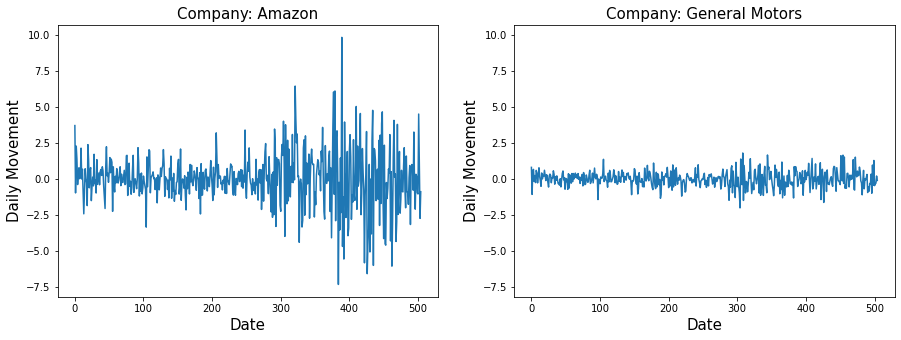

In [7]:
plt.figure(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
plt.title('Company: Amazon', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily Movement', fontsize = 15)
plt.plot(movements[0]) 

plt.subplot(1,2,2, sharey = ax1)
plt.title('Company: General Motors', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily Movement', fontsize = 15)
plt.plot(movements[15])

<p>As we can plainly see, these two stocks differ a lot as far as their scale is concerned. Amazon's stock seems more volatile  than the stock for General Motors. Therefore it is logical, before our analysis to normalize the values of the daily movements so as to account for this volatile behaviour and have both of these stocks contribute equally to the analysis.</p>

In [8]:
from sklearn.preprocessing import Normalizer

c_movements = movements.copy()
normalizer = Normalizer()
X = normalizer.fit_transform(c_movements)

<p>Now let us see whether things got a little better.</p>

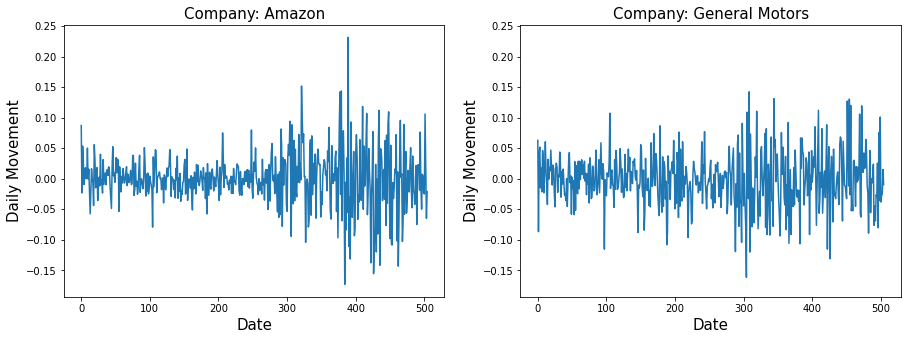

In [9]:
plt.figure(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
plt.title('Company: Amazon', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily Movement', fontsize = 15)
plt.plot(X[0])

plt.subplot(1,2,2, sharey = ax1)
plt.title('Company: General Motors', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily Movement', fontsize = 15)
plt.plot(X[15])

<p>These are not perfect, but compared to the graphs above, they are much better. At the very least, these two stocks (as well as all the other stocks) are now similarly affecting our analysis.</p>
<p>After doing that, we are now ready to begin clustering our data. So first up, is the <strong>Hierarchical Clustering</strong> technique.</p>

<hr style="border:1px solid gray">

### A. Hierarchical Clustering Analysis (Agglomerative Clustering Method).
<p>This procedure attempts to identify and build a hierarchy of relatively homogeneous groups of cases (or variables) based on selected characteristics of data. It should be noted that we do not know in advance how many clusters we want, but in order to determine just that, we use tree-like visual representation of the observations. All the clusters are combined (or separated) based on distance measures between and within clusters.</p>
<p>Hierarchical Clustering Analysis can be done in two ways:</p>
<ul>
    <li><strong>Divisive Hierarchical Clustering</strong>: Here all observations start as part of one big cluster, and splits are performed over and over again, as one moves down the hierarchy. This approach is also known as a "top-down" approach. Should a cluster be separated, these two new pieces can never go back to being one again. That is why this procedure is called hierarchical, because there is a structure to the separation of the clusters.</li>
    <li><strong>Agglomerative Hierarchical Clustering</strong>: This is the very opposite of the Divisive procedure described above. Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. It is also known as a "bottom-up" approach. One particular characteristic of this procedure is that once a cluster is formed, it can not be separated again.</li>
</ul>
<p>Since these two approaches get the same results, we shall use the <strong>Agglomerative Hierarchical Clustering</strong> method to separate our stocks into groups. In order to merge new clusters, this procedure uses two distance-based metrics:</p>
<ul>
    <li><span style="background-color: #e3e8e9"><i><strong>metric</strong></i></span> or <span style="background-color: #e3e8e9"><i><strong>affinity</strong></i></span>: This distance is the pairwise distance between individual observations and it can take values from the <span style="background-color: #e3e8e9"><i><strong>pdist</strong></i></span> function from the scipy library. Such values could be: <span style="background-color: #e3e8e9"><i><strong>'euclidean'</strong></i></span>, <span style="background-color: #e3e8e9"><i><strong>'minkowski'</strong></i></span>, <span style="background-color: #e3e8e9"><i><strong>'cityblock'</strong></i></span>, etc. (more on: <a href='https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/generated/scipy.spatial.distance.pdist.html'>https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/generated/scipy.spatial.distance.pdist.html</a>).</li>
    <li><span style="background-color: #e3e8e9"><i><strong>method</strong></i></span> or <span style="background-color: #e3e8e9"><i><strong>linkage</strong></i></span>: This distance metric determines how the distance between clusters will be measured. It takes values such as: <span style="background-color: #e3e8e9"><i><strong>'single'</strong></i></span>, <span style="background-color: #e3e8e9"><i><strong>'complete'</strong></i></span>, <span style="background-color: #e3e8e9"><i><strong>'average'</strong></i></span>, <span style="background-color: #e3e8e9"><i><strong>'ward'</strong></i></span>, etc. (more on: <a href='https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html'>https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html</a>).</li>
</ul>
<p>Let us now see this method in action. First of all, we shall form the dendrograms in order to see if we can detect the number of clusters in our data.</p>

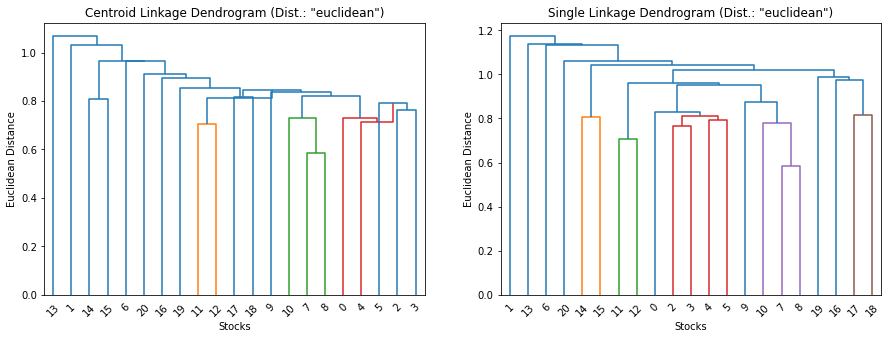

In [10]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,5))

ax1 = plt.subplot(121)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'centroid', metric = 'euclidean'))
plt.title('Centroid Linkage Dendrogram (Dist.: "euclidean")')
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')

ax2 = plt.subplot(122)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single', metric = 'euclidean'))
plt.title('Single Linkage Dendrogram (Dist.: "euclidean")')
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')
plt.show()

<p>It appears that some of these methods have fallen for the so called <i>'chaining effect'</i>. One observation is connected to another, then the second observation to a third and so on. These dendrograms do not form proper clusters and could indicate outliers, but since we want to use all the 21 stocks, we shall not be getting rid of any observations and thus, ignore these methods and use others that produce adequate clustering results.</p>

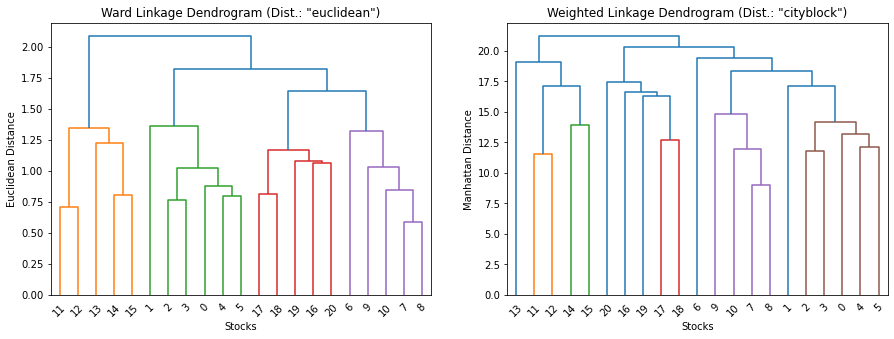

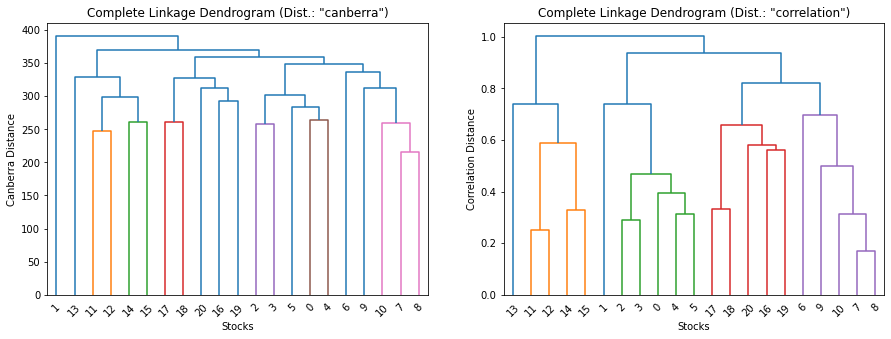

In [11]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,5))

ax1 = plt.subplot(121)
dendrogram1 = sch.dendrogram(sch.linkage(X, method = 'ward', metric = 'euclidean'))
plt.title('Ward Linkage Dendrogram (Dist.: "euclidean")')
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')

ax2 = plt.subplot(122)
dendrogram2 = sch.dendrogram(sch.linkage(X, method = 'weighted', metric = 'cityblock'))
plt.title('Weighted Linkage Dendrogram (Dist.: "cityblock")')
plt.xlabel('Stocks')
plt.ylabel('Manhattan Distance')
plt.show()

plt.figure(figsize = (15,5))
ax1 = plt.subplot(121)
dendrogram3 = sch.dendrogram(sch.linkage(X, method = 'complete', metric = 'canberra'))
plt.title('Complete Linkage Dendrogram (Dist.: "canberra")')
plt.xlabel('Stocks')
plt.ylabel('Canberra Distance')

ax2 = plt.subplot(122)
dendrogram4 = sch.dendrogram(sch.linkage(X, method = 'complete', metric = 'correlation'))
plt.title('Complete Linkage Dendrogram (Dist.: "correlation")')
plt.xlabel('Stocks')
plt.ylabel('Correlation Distance')
plt.show()

<p>As we can see from the dendrograms above, we definitely have two clusters, but it is strongly indicated that we could also have three, or four clusters. This is a very arduous procedure, as we can never be certain about the exact number of clusters that we have. In our example, most of the dendrograms that did not fall into 'chaining effect', represented three to four clusters. Thus, in this exercise, we shall choose to believe that we have four clusters.</p>
<p>After all, we did know that we would have somewhere around four of them, but it still is very comforting to know that even if we did not, the dendrograms would eventually point us in the right direction, if we were sharp enough to notice.</p>
<p>The most promising one of them all looks to be the one that uses complete linkage and computes distance, based on the correlation of the data. So let us use it and see how well it can cluster our stocks.</p>
<p>First for three clusters:</p>

In [12]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'correlation', linkage = 'complete')
labels = hc.fit_predict(X)

In [13]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df1

,labels,companies
10,0,MSCI
18,0,Astrazeneca PLC
17,0,GlaxoSmithKlyne
16,0,Pfizer
19,0,Amgen
9,0,Nasdaq
8,0,Moody's
20,0,Abbvie
6,0,Morningstar
7,0,S&P Global


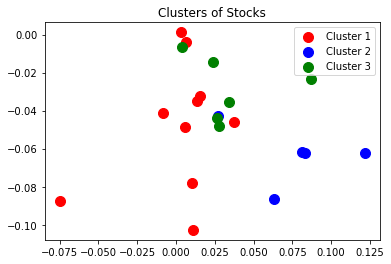

In [14]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Stocks')
plt.legend()
plt.show()

<p>As expected, two groups got merged into one, as they had no other cluster to belong to (the <i><strong>Financial Services Sector</strong></i> and the <i><strong>Pharmaceutical Sector</strong></i>). The <i><strong>Automotive Sector</strong></i> as well as the <i><strong>Technological Sector</strong></i> got classified correctly.</p>
<p>Therefore, all in all, this was not such a big disaster. If we did not attempt anything else, we would have gotten two sectors correctly classified.</p>
<p>Now, let us try the same thing, but for four clusters.</p>

In [15]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'correlation', linkage = 'complete')
labels = hc.fit_predict(X)

In [16]:
df2 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df2

,labels,companies
0,0,Amazon
1,0,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
15,1,General Motors Company
14,1,Ford Motor Company
13,1,Blue Bird
12,1,Honda


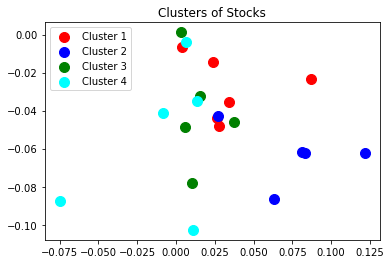

In [17]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Stocks')
plt.legend()
plt.show()

<p>It definitely looks better than before, but let us use the <strong>Ground Truth</strong> and see how good this approach really is. What we shall do, is construct a <strong>Confusion Matrix</strong>, which is a specific table layout that will visually show us the performance of our algorithm. In order to do that, first we will sort our resulting data frame (<i>df2</i>) based on the index.</p>

In [18]:
df3 = pd.DataFrame.sort_index(df2)
df3

,labels,companies
0,0,Amazon
1,0,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
6,2,Morningstar
7,2,S&P Global
8,2,Moody's
9,2,Nasdaq


<p>Now we have to switch some labels. See, the <i><strong>Financial Sector</strong></i> got mostly grouped in group 3 (<i>label:2</i>), while the <i><strong>Automotive Sector</strong></i> in group 2(<i>label:1</i>). This sort of thing would mix up our Confusion matrix and make it show like they were misclassified, which they were not.</p>
<p>Hence, let us switch those labels.</p>

In [19]:
df3.loc[df3['labels']==2, 'labels'] = 4
df3.loc[df3['labels']==1, 'labels'] = 2
df3.loc[df3['labels']==4, 'labels'] = 1
df3

,labels,companies
0,0,Amazon
1,0,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
6,1,Morningstar
7,1,S&P Global
8,1,Moody's
9,1,Nasdaq


#### <i><u>Confusion Matrix</u></i>:

In [20]:
pd.crosstab(ground_truth, df3['labels'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3
Actual,,,,
0,6,0,0,0
1,0,5,0,0
2,0,0,5,0
3,0,0,0,5


<p>A perfect classification with no errors whatsoever. Usually, grouping using <strong>Hierarchical Clustering Analysis</strong> is a tricky procedure and often does not lead to desired results. And keep in mind that we used the best-case scenario. There are so many options that we can get lost, while trying to pick the one that will give us adequate results. Even though, Ward's Method along with Euclidean Distance would end up with the same results.</p>
<p> Since we have the <strong>Ground Truth</strong>, let us also calculate the <strong>Adjusted Rand Index</strong>. The Rand Index computes a similarity measure between two clusters by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusters. It takes values between 0 and 1 and the closer it is to 1, the better our clustering worked.</p>

#### <i><u>Adjusted Rand Index</u></i>:

In [21]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(ground_truth, df3['labels'])

1.0

<p>Perfect score, all the stocks got grouped exactly where they belonged, just as we suspected from the <strong>Confusion Matrix</strong> above. In conclusion, this was <strong>Hierarchical Clustering Analysis</strong>. It can be tricky especially since one has to look at a lot of dendrograms to get a feeling for the approximate number of clusters, but it gives adequate and quick results. Although mostly they will not be as perfect as in our example.</p>
<p>Next up, is <strong>Partitioning Clustering</strong>.</p>

<hr style="border:1px solid gray">

### B. Partitioning Clustering (K-Means Clustering).
<p>As we have previously mentioned, when we cluster the observations of a data set, what we essentially need is to partition them into distinct groups so that the observations within each group are similar to each other, while observations in different groups are different from each other.</p>
<p>One of the most common partitioning clustering techniques, is <strong>K-Means Clustering</strong>. What it does, is it partitions a data set into K distinct, non-overlapping clusters. It differs from <strong>Hierarchical Clustering Analysis</strong> in two ways:</p>
<ul>
    <li>In order to use <strong>K-Means Clustering</strong>, we have to know the number of total clusters before we run our algorithm.</li>
    <li>If two observations form a cluster, they can be divided later on and become parts of different clusters. This merging and division of cluster observations is repeated until the algorithm converges.</li>
</ul>
<p>The algorithm is pretty simple and works in the following way:</p>
<ol>
    <li>A number of <i>K</i> cluster "centers" are formed at random locations, or based on initial values.</li>
    <li>For every observation of our data, the distance between each observation and the k center points is calculated and each of those observations are assigned to a center, which is nearest to them.</li>
    <li>Based on the observations in each cluster, new center points are calculated and assigned to each cluster.</li>
    <li> Steps 2 and 3 are repeated until we have reached convergence, meaning that no observation changes in cluster membership.</li>
</ol>
<p> We should also keep in mind that in order for this technique to work successfully, it helps if the clusters are convex  shaped, also if our data are scaled equally and finally, if each cluster has a similar number of observations.</p>

<p><i><u>Picking the Right Number of Clusters:</u></i></p>
<p>As we have said, this technique demands to know the number of clusters beforehand. Based on the dendrograms, which we depicted in <strong>Hierarchical Clustering Analysis</strong>, we ended up picking either three or four clusters. We expect that this technique will also perform adequately under those two options. Fortunately though, <strong>K-Means Clustering</strong> has its own techniques to determine the optimal number of clusters into which our data may be grouped.</p>
<p>Let us try the so called <strong>"Elbow Method"</strong>:</p>

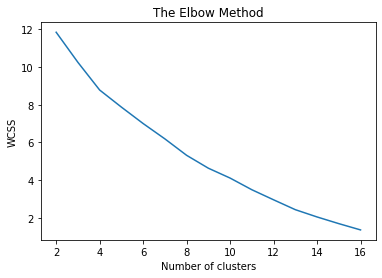

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 17), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<p>This method works by utilizing something called inertia, which is within-cluster sums of squares (<i>WCSS</i>). In other words, it is the sum of squared distances of samples to their closest cluster center.</p>
<p>In the graph we are looking for the point at which our line bends in a discernible way (much like an elbow). Here it looks like this point is at four, or maybe five or even six clusters. If we are being candid, there were little to no evidence of having five clusters, while we ran <strong>Hierarchical Clustering Analysis</strong>, and therefore it is highly unlikely to have five or more clusters, thus it is probably four.</p>

#### K-Means Clustering (for four clusters):

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, max_iter = 1000, random_state = 300)
labels = kmeans.fit_predict(X)

In [24]:
df4 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df4

,labels,companies
20,0,Abbvie
18,0,Astrazeneca PLC
17,0,GlaxoSmithKlyne
16,0,Pfizer
19,0,Amgen
15,1,General Motors Company
14,1,Ford Motor Company
13,1,Blue Bird
12,1,Honda
11,1,Toyota


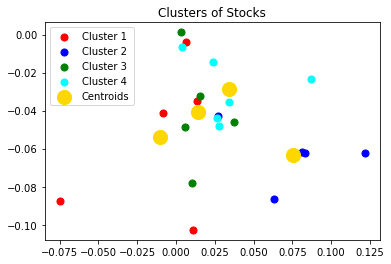

In [25]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'gold', label = 'Centroids')
plt.title('Clusters of Stocks')
plt.legend()
plt.show()

<p>Seems like a perfect fit, but to be certain, we will once again calculate and present the <strong>Confusion Matrix</strong> and the <strong>Adjusted Rand Index</strong>. Before we do that, we shall need to re-label all the labels of our data frame above (<i>df4</i>) so that they match the ones used in our <strong>Ground Truth</strong> array.</p>

In [26]:
df5 = pd.DataFrame.sort_index(df4)
df5

,labels,companies
0,3,Amazon
1,3,Tesla
2,3,Advanced Micro Devices
3,3,NVIDIA
4,3,Microsoft
5,3,Apple
6,2,Morningstar
7,2,S&P Global
8,2,Moody's
9,2,Nasdaq


In [27]:
df5.loc[df5['labels']==3, 'labels'] = 4
df5.loc[df5['labels']==0, 'labels'] = 3
df5.loc[df5['labels']==4, 'labels'] = 0
df5.loc[df5['labels']==1, 'labels'] = 5
df5.loc[df5['labels']==2, 'labels'] = 1
df5.loc[df5['labels']==5, 'labels'] = 2
df5

,labels,companies
0,0,Amazon
1,0,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
6,1,Morningstar
7,1,S&P Global
8,1,Moody's
9,1,Nasdaq


#### <i><u>Confusion Matrix:</u></i>

In [28]:
pd.crosstab(ground_truth, df5['labels'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3
Actual,,,,
0,6,0,0,0
1,0,5,0,0
2,0,0,5,0
3,0,0,0,5


#### <i><u>Adjusted Rand Index:</u></i>

In [29]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(ground_truth, df5['labels'])

1.0

<p>Once again, a perfect fit. All the stocks got clustered into the correct groups, just as we wanted. This result of course, was dependent on where we initiate our algorithm. Here it initiated on random initial values. If we tinker a bit with the <span style="background-color: #e3e8e9"><i><strong>random_state</strong></i></span> of the algorithm, we could get to another solution which is not as good as this one.</p>
<p><u><i>For example:</i></u></p>

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, max_iter = 1000, random_state = 500)
labels = kmeans.fit_predict(X)

In [31]:
df6 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df6

,labels,companies
0,0,Amazon
1,0,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
9,1,Nasdaq
8,1,Moody's
10,1,MSCI
6,1,Morningstar


#### <i><u>Confusion Matrix</u></i>:

In [32]:
pd.crosstab(ground_truth, df6['labels'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3
Actual,,,,
0,6,0,0,0
1,0,5,0,0
2,0,0,4,1
3,0,0,0,5


#### <i><u>Adjusted Rand Index:</u></i>

In [33]:
adjusted_rand_score(ground_truth, df6['labels'])

0.87374749498998

<p>Just because we initiated our algorithm on another starting point, now the centers that were formed included an erroneously grouped observation (Toyota into the <strong>Pharmaceutical Sector</strong>). Therefore, we should note this, when running the <strong>K-Means</strong> algorithm.</p>
<p>Let us now explore how <strong>Density-Based Clustering</strong> groups our data.</p>

<hr style="border:1px solid gray">

### C. Density-Based Clustering.
<p>Yet another famous clustering technique is the <strong>Density-Based Clustering</strong>. Just as its name suggests, it views clusters in forms of density. In our data, observations with similar characteristics should stick close to each other, as opposed to observations that differ from each other. That is why the logic of this algorithm is that our data will be separated into high and low density areas. The high density areas will be considered as individual clusters and if the observations are not a part of that area, they are believed to be outliers.</p>
<p>As opposed to the <strong>K-Means Clustering</strong> algorithm, <strong>Density-Based Clustering</strong> does not assume that the shape of our clusters will be convex. Instead it is very flexible in this way, letting clusters be of any shape possible, as long as they are highly densed. This could also be considered a downside of this algorithm, because if there are clusters of varying density, then this can make it hard for this algorithm to identify them.</p>
<p><strong>Density-Based Clustering</strong> does not need to know beforehand the number of clusters. It does however need to know the minimum number of data points that constitute a cluster, as well as, the maximum distance between each observation point.</p>
<p>It works like this:</p>
<ol>
    <li>One of the observations is chosen at random.</li>
    <li>Based on the distance and the minimum number of neighbours, this observation is considered whether it should be a part of a cluster.</li>
    <li>It repeats recursively for each of the neighbouring data points to the chosen observation.</li>
    <li>The next observation is chosen, taking us back to <i>Step 1</i>.</li>
</ol>
<p>Let us now see how <strong>Density-Based Clustering</strong> performs on our data:</p>

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.95, min_samples=2)
labels = dbscan.fit_predict(X)

In [35]:
df7 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df7

,labels,companies
20,-1,Abbvie
1,-1,Tesla
16,-1,Pfizer
13,-1,Blue Bird
19,-1,Amgen
6,-1,Morningstar
0,0,Amazon
4,0,Microsoft
3,0,NVIDIA
2,0,Advanced Micro Devices


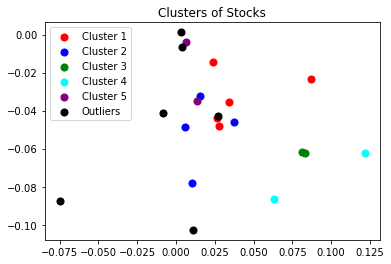

In [36]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 50, c = 'purple', label = 'Cluster 5')
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], s = 50, c = 'black', label = 'Outliers')
plt.title('Clusters of Stocks')
plt.legend()
plt.show()

<p>Compared to the previous clustering techniques, this one performs poorly. We have six observations that were not grouped in a cluster and thus were considered outliers. All the groups lost at least one stock, while the <strong>Automotive Sector</strong> got split up into two separate clusters. This is of course due to the parameters that we chose, there may certainly be other combinations that could give us a more adequate result.</p>

In [37]:
df8 = pd.DataFrame.sort_index(df7)
df8

,labels,companies
0,0,Amazon
1,-1,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
6,-1,Morningstar
7,1,S&P Global
8,1,Moody's
9,1,Nasdaq


In [38]:
df8.loc[df8['labels']==3, 'labels'] = 5
df8.loc[df8['labels']==4, 'labels'] = 3
df8.loc[df8['labels']==5, 'labels'] = 4
df8

,labels,companies
0,0,Amazon
1,-1,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
6,-1,Morningstar
7,1,S&P Global
8,1,Moody's
9,1,Nasdaq


#### <i><u>Confusion Matrix</u></i>:

In [39]:
pd.crosstab(ground_truth, df8['labels'], rownames=['Actual'], colnames=['Predicted'])

Predicted,-1,0,1,2,3,4
Actual,,,,,,
0,1,5,0,0,0,0
1,1,0,4,0,0,0
2,1,0,0,2,0,2
3,3,0,0,0,2,0


#### <i><u>Adjusted Rand Index:</u></i>

In [40]:
adjusted_rand_score(ground_truth, df8['labels'])

0.4567627494456763

<p>This was something expected from what we deduced from the data frame above. <strong>Density-Based Clustering</strong> algorithm did not provide as good results as the previous two and this was perhaps due to the nature of our data. The points are too close to each other and some even cross over to other clusters, making it difficult to discern if they belong to one cluster, or another, thus rightfully classifying them as outliers. Still the groups that were clustered correctly, had the right stocks in them. Therefore it was an alright technique, but definitely lacked the precision of the previous two.</p>
<p>Finally, let us see <strong>Gaussian Mixture Model Clustering</strong>.</p>

<hr style="border:1px solid gray">

### D. Gaussian Mixture Model Clustering.
<p>This approach assumes that our groups are normally distributed and uses a probabilistic approach to model the labels of the population that we are interested in. It is frequently used on multimodal data with precise results. Each cluster is described in terms of a Gaussian density, which has a centroid (as in <strong>K-Means Clustering</strong>), and a covariance matrix. Knowing the number (<i>K</i>) of components (or centroids), the <strong>Gaussian Mixture Model Clustering</strong> algorithm uses the <strong><i>Expectation-Maximization</i></strong> technique to estimate the model's parameters. This is a is a numerical technique for maximum likelihood estimation and it works like this:</p>
<ol>
    <li>In the E-step (or Expectation step), each observation is assigned a responsibility or weight for each cluster, based on the likelihood of each of the corresponding Gaussians. Observations close to the center of a cluster will most likely get weight 1 for that cluster, and weight 0 for every other cluster, while observations in-between the two clusters divide their weight accordingly.</li>
    <li>In the M-step (or Maximization step), the algorithm maximizes the expectations calculated in the previous step with respect to the model parameters. Each observation contributes to the weighted means (and covariances) for every cluster.</li>
</ol>
<p>These steps are repeated until the algorithm reaches convergence.</p>
<p>This algorithm can start off from a random set of initial values and reach convergence from there, but it can also start off of K-Means initial values, which are said to improve its clustering capabilities. Let us try both:</p>

<i><u>Random Starting Values:</u></i>

In [41]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=300)
labels = gmm.fit_predict(X)

df9 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df9

,labels,companies
18,0,Astrazeneca PLC
17,0,GlaxoSmithKlyne
16,0,Pfizer
11,0,Toyota
19,0,Amgen
9,0,Nasdaq
8,0,Moody's
0,1,Amazon
10,1,MSCI
6,1,Morningstar


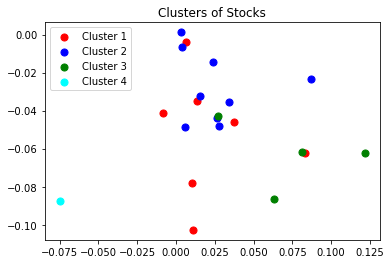

In [42]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Stocks')
plt.legend()
plt.show()

<p>Even without the calculation of a <strong>Confusion Matrix</strong>, we can see that this was a disaster. All the groups got mixed together and the clustering makes no sense whatsoever. So let us see if we can improve on it by changing the starting values. Using random starting values in this case does not work as well as we would have hoped. Maybe increasing the number of iterations could do the algorithm some good.</p>

<i><u>K-Means Starting Values:</u></i>

In [43]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, n_init = 10, init_params='kmeans', random_state=8)
labels = gmm.fit_predict(X)

df10 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df10

,labels,companies
0,0,Amazon
1,0,Tesla
2,0,Advanced Micro Devices
3,0,NVIDIA
4,0,Microsoft
5,0,Apple
9,1,Nasdaq
8,1,Moody's
10,1,MSCI
6,1,Morningstar


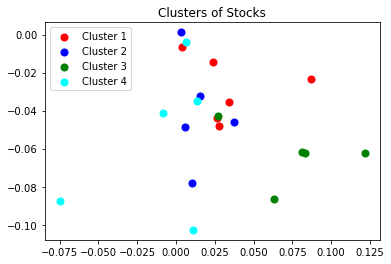

In [44]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Stocks')
plt.legend()
plt.show()

#### <i><u>Confusion Matrix</u></i>:

In [45]:
pd.crosstab(ground_truth, df10['labels'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3
Actual,,,,
0,6,0,0,0
1,0,5,0,0
2,0,0,5,0
3,0,0,0,5


#### <i><u>Adjusted Rand Index:</u></i>

In [46]:
adjusted_rand_score(ground_truth, df10['labels'])

1.0

<p>A perfect fit, which means that this way the algorithm works like a charm.</p>

### <u><i>Conclusion to Section 1:</i></u>
<p>We saw that truly stocks can be aggregated on their daily movements into groups. That could potentially help us diversify our portfolio and mitigate some of the risk that might involve our investment.</p>
<p>Out of all the techniques we saw, only <strong>Density-Based Clustering</strong> produced sub-optimal results. All the other techniques worked perfectly. That being said, we would probably choose to use <strong>K-Means Clustering</strong>, or  perhaps <strong>Gaussian Mixture Models</strong> to group our stocks. While <strong>Hierarchical Clustering Analysis</strong> was an okay approach, it all depended on choosing the right <i>linkage</i> and <i>distance metric</i> to get the right results. And with a good tuning, <strong>K-Means Clustering</strong> does the selection automatically. We would however use dendrograms in addition to other techniques to get the feeling of the right number of clusters.</p>
<p>This is definitely not an easy procedure, but given the chance, it can lead us to interesting results.</p>

<hr style="border:5px solid gray">
<hr style="border:1px solid gray">
<hr style="border:1px solid gray">

## <i><u>Section 2: Supervised Machine Learning</u></i>.
<p><strong>Supervised Machine Learning</strong> is a procedure that uses <strong><i>labeled</i></strong> datasets to train algorithms that are used to either classify data or predict outcomes. The training data provided to our computer work as the supervisor that guide our machine with the intention of predicting accurate results. <strong>Supervised Machine Learning</strong> is divided into two main categories:</p>
<ul>
    <li><strong><i>Regression:</i></strong> Here the response variable is a continuous, numerical value. We may have a number of features and based on those what we want is to observe how our output behaves.</li>
    <li><strong><i>Classification:</i></strong> In this case, the response variable is discreet and used to divide groups based on the features that are provided to us.</li>
</ul>
<p>So let us try and give two examples for each of those categories.</p>

### <u><i>1. Our Example for Regression:</i></u>
<p>Since one of the merits of <strong>Supervised Machine Learning</strong>, is that it can predict outcomes, then one good application in <strong>Finance</strong> would be the prediction of <strong><i>Stock Closing Prices</i></strong>, based on the <strong><i>Stock Opening Prices</i></strong> and their <strong><i>Volume</i></strong>. If we can see a good pattern between the real and the predicted values, then our algorithms will have succeeded, but it must be hard achieving that, because otherwise we would all be swimming in money.</p>
<p>Let us take a stock, say that of S&P500 (<i>GSPC</i>) for the duration of three business years (start of 2019 - end of 2021) and see if we can predict the <strong><i>Stock Closing Prices</i></strong> at the end of 2021.</p>
<p>Hence, we will import the necessary libraries and data:</p>

### <i>Importing the Necessary Libraries:</i>

In [47]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import datetime as dt
import matplotlib.pyplot as plt

### <i>Getting and Visualizing the Data:</i>

In [48]:
ticker = '^GSPC'
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2021, 12, 31)

df = data.DataReader(ticker, 'yahoo', start_date, end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029
2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893
2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941
2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941
2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912
...,...,...,...,...,...,...
2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941
2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098
2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059


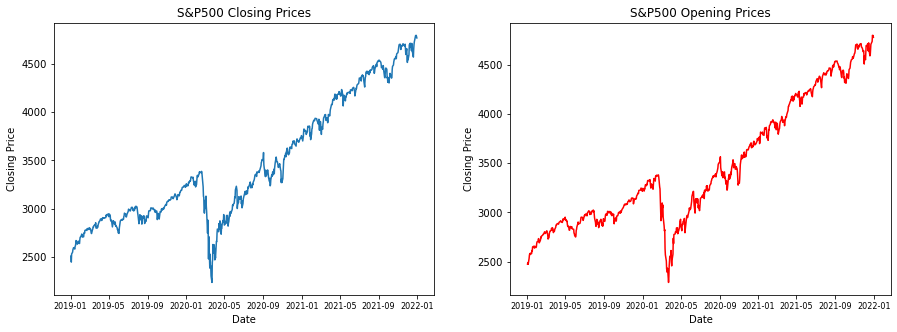

In [49]:
plt.figure(figsize = (15,5))
plt.rc('xtick', labelsize = 8)

ax1 = plt.subplot(121)
plt.plot(df['Close'])
plt.title('S&P500 Closing Prices')
plt.ylabel('Closing Price')
plt.xlabel('Date')

ax2 = plt.subplot(122)
plt.plot(df['Open'], color='red')
plt.title('S&P500 Opening Prices')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.show()

<p>Admittedly, these two graphs look like they are identical to each other and there is some truth to it, as opening prices are pretty close to closing prices and they adjust day by day. However, if we look a bit closer, we will see that these two sets of values are not the same. Let us, for instance, take the first fifteen days and visualize the closing and the opening prices.</p>

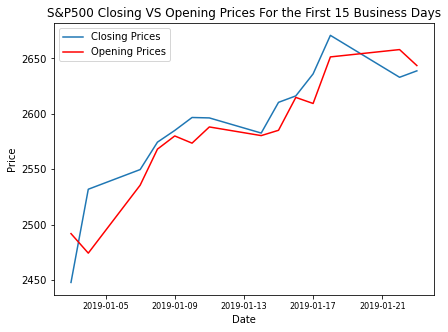

In [50]:
plt.figure(figsize = (15,5))

ax1 = plt.subplot(121)
plt.rc('xtick', labelsize = 8)
plt.plot(df['Close'][1:15])
plt.plot(df['Open'][1:15], color='red')
plt.title('S&P500 Closing VS Opening Prices For the First 15 Business Days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Closing Prices', 'Opening Prices'])
plt.show()

<p>Therefore, even those these two prices move in the same direction most of the time, they are not identical.</p>

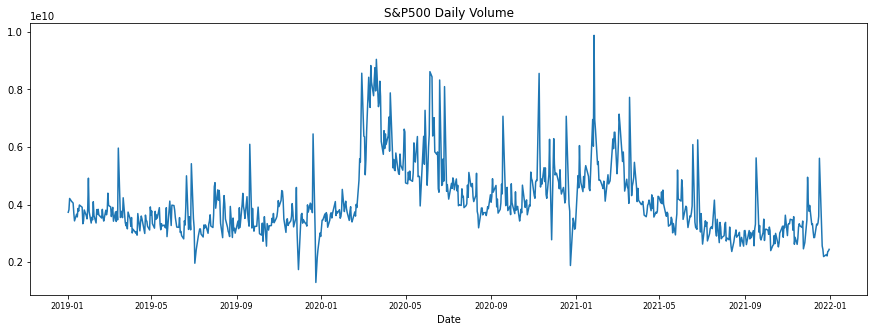

In [51]:
plt.figure(figsize = (15,5))

plt.rc('xtick', labelsize = 8)
plt.plot(df['Volume'])
plt.title('S&P500 Daily Volume')
plt.xlabel('Date')
plt.show()

### <i>Scaling our Features and Response variable:</i>
<p>We shall standardize our data so as to help our algorithms function properly. <strong><i>Multiple Linear Regression</i></strong> would be fine for instance, but other algorithms (such as <strong><i>Support Vector Regression</i></strong>) need this step, because otherwise they might neglect some feature.</p>

In [52]:
X = pd.DataFrame(df[['Open', 'Volume']])
y = df[['Close']]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X))
y = sc_y.fit_transform(y)

### <i>Splitting our Data into Train and Test parts:</i>
<p>Having a sense of how the values of our variables move, it is now time to split our data into train and test parts so as to measure and see the performance of each algorithm, when prediction is performed on the <strong>Closing Prices</strong>. In total we have 757 observations, thus we shall use the first 657 in order to predict the last 100.</p>

In [53]:
# The Feature matrix train-test split:
X_train = X[:657] # Starts from 0.
X_test = X[657:]

# The response vector train-test split:
y_train = y[:657]
y_test = y[657:]

<hr style="border:1px solid gray">

### A. (Multiple) Linear Regression.
<p> This is a very old and, in all probability, the first statistical model that tries to represent a linear relationship between the features and the target vector. When we have more than one explanatory variables (like we do in this example, we are talking about a <strong>Multiple Linear Regression</strong>. This model for our problem can be written in the following form:</p>
<p>${y}_{i} = {\beta}_{0} + {\beta}_{1}x_{i1} + {\beta}_{2}x_{i2} +{\epsilon}_{i}$</p>
<p>where $x_{i1}$ represent the <strong><i>Stock Opening Prices</i></strong> and $x_{i2}$ is the <strong><i>Volume</i></strong>.</p>
<p>Now, let us apply this model on our data and see how well it will predict our closing stock prices.</p>

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [55]:
df_lr = pd.DataFrame(y_test)
df_lr['Predictions'] = lr_pred
df_lr.columns = ['Real Values', 'Predictions']
df_lr

,Real Values,Predictions
0,1.525524,1.533010
1,1.554358,1.540466
2,1.565582,1.570704
3,1.583912,1.563957
4,1.534400,1.563766
...,...,...
95,2.071496,1.992140
96,2.063919,2.088554
97,2.074423,2.077044
98,2.051991,2.085672


<strong><i><u>Root Mean Square Error (RMSE):</u></i></strong>

In [56]:
from sklearn.metrics import mean_squared_error
rmse_lr = np.sqrt(mean_squared_error(df_lr['Real Values'], df_lr['Predictions']))
rmse_lr

0.049638482026864404

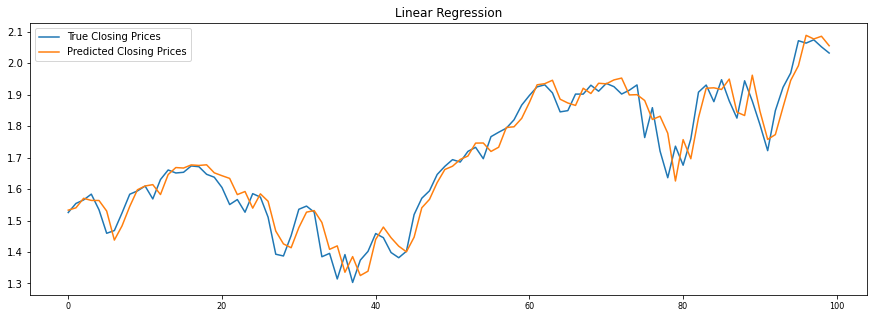

In [57]:
plt.figure(figsize=(15,5))
plt.plot(df_lr)
plt.title('Linear Regression')
plt.legend(['True Closing Prices', 'Predicted Closing Prices'])
plt.show()

<p>All in all, this was not a bad fit. There are of course some deviations and it is not exactly as the real <strong>Stock Closing Prices</strong>, but this prediction works well. The orange line is behaving very similarly to the blue one. Plus, <strong><i>RMSE</i></strong> is quite small, but as always we are looking for the smallest of them all.</p>
<p>Now let's see how the other algorithms fare. Next up is <strong><i>Support Vector Regression (SVR)</i></strong>.</p>

<hr style="border:1px solid gray">

### B. Support Vector Regression (SVR).
<p>This is a generalization of the <strong>Support Vector Machine</strong> algorithm, but it works in a similar way. The reason it was introduced is, of course, the need to work on continuous response variables. As we recall, the optimization problem in <strong>Support Vector Machine</strong> is a problem of finding the maximum margin separating the hyperplane, while correctly classifying as many training points as possible. This is achieved similarly in <strong>Support Vector Regression</strong>, with the introduction of an <i>$\epsilon$-insensitive</i> region around the function, called the <i>$\epsilon$-tube</i>. Let us get a better understanding by looking at the graph below:</p>

![alt text](https://cdn.educba.com/academy/wp-content/uploads/2020/01/SVR-chart.png.webp "Title")

<p>As we can see, the hyperplane separates the two classes as best as it can. There are some data points that fall inside the <i>$\epsilon$-tube</i> for which we will be disregarding the error when we do our calculations. The only error that we are going to take into account is of those points ($\xi_{i}$ and $\xi_{i}^*$) that are outside the tube. Essentially, what we want is to minimize the sum of the error points outside of the <i>$\epsilon$-tube</i>. So somewhat like a Linear Regression, we perform an optimization by first defining a convex <i>$\epsilon$-insensitive</i> loss function to be minimized and finding the flattest tube that contains most of the training instances. Hence, what we end up with, is a function which consists of the loss function and the geometrical properties of the tube. Mathematically, the optimization problem of <strong>Support Vector Regression</strong> is formed like this:</p>
<p>$\min\{\frac{1}{2}\lVert w \rVert^2 + C\sum_{i=1}^{N}(\xi_{i}$ + $\xi_{i}^*)\}, \hspace{0.2cm} for \hspace{0.2cm} i= 1,..., N.$</p>
<p>subject to:</p>
<p>$y_{i} - w^Tx_{i}\le \epsilon + \xi_{i}^*, \hspace{0.2cm} for \hspace{0.2cm} i= 1,..., N.$</p>
<p>$w^Tx_{i} - y_{i}\le \epsilon + \xi_{i}, \hspace{0.2cm} for \hspace{0.2cm} i= 1,..., N.$</p>
<p>$\xi_{i}^*, \xi_{i}\ge 0, \hspace{0.2cm} for \hspace{0.2cm} i= 1,..., N.$</p>
<p>Here $\lVert w \rVert$ is the magnitude of the normal vector to the surface that is being approximated, while $C$  is a 
regularization — thus, a tunable parameter that gives more weight to minimizing the flatness, or the error, for this minimization problem.</p>
<p>Now let us run it and see what results we shall get:</p>

In [58]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear', C = 40, epsilon = 0.0001) # High l2 penalty, high precision.
svr.fit(X_train, y_train.ravel())
svr_pred = svr.predict(X_test)

In [59]:
df_svr = pd.DataFrame(y_test)
df_svr['Predictions'] = svr_pred
df_svr.columns = ['Real Values', 'Predictions']
df_svr

,Real Values,Predictions
0,1.525524,1.532851
1,1.554358,1.539958
2,1.565582,1.569969
3,1.583912,1.563676
4,1.534400,1.563724
...,...,...
95,2.071496,1.991366
96,2.063919,2.087741
97,2.074423,2.076435
98,2.051991,2.085094


<strong><i><u>Root Mean Square Error (RMSE):</u></i></strong>

In [60]:
from sklearn.metrics import mean_squared_error
rmse_svr = np.sqrt(mean_squared_error(df_svr['Real Values'], df_svr['Predictions']))
rmse_svr

0.04985604916709515

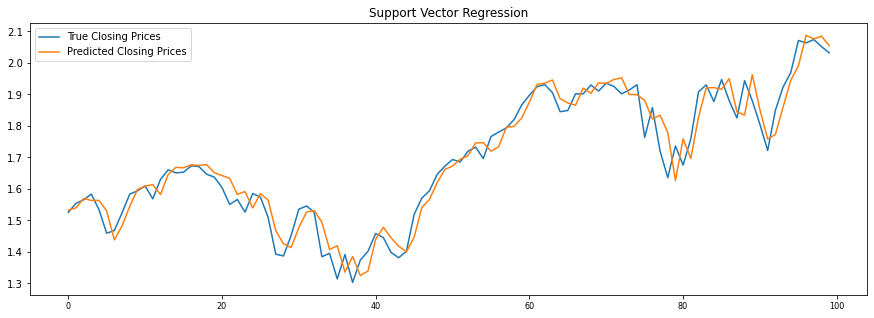

In [61]:
plt.figure(figsize=(15,5))
plt.plot(df_svr)
plt.title('Support Vector Regression')
plt.legend(['True Closing Prices', 'Predicted Closing Prices'])
plt.show()

<p>That is an okay fit, much like the one we had in <strong>Linear Regression</strong>, albeit a bit worse, when comparing the two <strong><i>RMSE</i></strong> values. Looking at the graph it does come pretty close to the real values.</p>

<hr style="border:1px solid gray">

### C. Random Forest Regression.
<p>Random forest is an ensemble algorithm and what it means is that it uses several algorithms together with the aim of improving predictions in general. What it specifically does, is it combines several decision trees, where each tree provides a single vote toward the final prediction. The final random forest calculates a final output as an average of the results of all the trees it is composed of.</p>
<p>It works in the following manner:</p>
<ol>
    <li>It selects a random number of K data points from the training set.</li>
    <li>It builds the decision tree associated to these K data points. Each of the trees makes its own individual prediction.</li>
    <li>It repeats steps 1 and 2 for the number of trees we have chosen to build.</li>
    <li>The predictions made by the decision trees are then averaged to produce a single result.</li>
</ol>
<p>So this is simple enough, let us see how it works:</p>

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 42)
rfr.fit(X_train, y_train.ravel())
rfr_pred = rfr.predict(X_test)

In [63]:
df_rfr = pd.DataFrame(y_test)
df_rfr['Predictions'] = rfr_pred
df_rfr.columns = ['Real Values', 'Predictions']
df_rfr

,Real Values,Predictions
0,1.525524,1.508850
1,1.554358,1.506958
2,1.565582,1.506958
3,1.583912,1.508380
4,1.534400,1.492408
...,...,...
95,2.071496,1.506958
96,2.063919,1.506958
97,2.074423,1.506958
98,2.051991,1.506958


<strong><i><u>Root Mean Square Error (RMSE):</u></i></strong>

In [64]:
from sklearn.metrics import mean_squared_error
rmse_rfr = np.sqrt(mean_squared_error(df_rfr['Real Values'], df_rfr['Predictions']))
rmse_rfr

0.27581848029895234

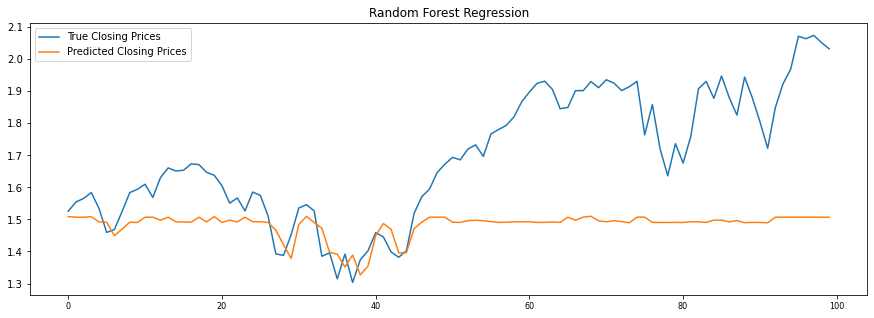

In [65]:
plt.figure(figsize=(15,5))
plt.plot(df_rfr)
plt.title('Random Forest Regression')
plt.legend(['True Closing Prices', 'Predicted Closing Prices'])
plt.show()

<p>Admittedly this was a disaster. So far this was the worst prediction yet. See the <strong>Random Forest</strong> algorithm has an issue, it cannot extrapolate. This is to say that when the Random Forest Regressor is tasked with the problem of predicting for values not previously seen, it will always predict an average of the values seen previously. And unfortunately, the average of a sample can not go beyond the highest and lowest values in the sample.</p>

<hr style="border:1px solid gray">

### D. Stacking Regressor.
<p>After taking into account all those results, there is a better thing that we can do. What if we could aggregate all those previously mentioned regressors into a single model and have this much more complex model do our final predictions? If we did that, we would get the so called stacked generalization. And that is exactly what we shall do for our regression problem, we will put the strengths of each of the algorithms previously used and make this model do a prediction for us. Since we will not be specifying a particular algorithm as an output for this ensemble, the output will be calculated using Cross-Validated Ridge Regression.</p>

In [66]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


level0 = list()
level0.append(('svr', SVR()))
level0.append(('rfr', RandomForestRegressor()))
level0.append(('lr', LinearRegression()))

sr = StackingRegressor(estimators=level0, cv=10)
sr.fit(X_train, y_train.ravel())
sr_pred = sr.predict(X_test)

In [67]:
df_sr = pd.DataFrame(y_test)
df_sr['Predictions'] = sr_pred
df_sr.columns = ['Real Values', 'Predictions']
df_sr

,Real Values,Predictions
0,1.525524,1.540406
1,1.554358,1.545700
2,1.565582,1.572564
3,1.583912,1.569488
4,1.534400,1.569700
...,...,...
95,2.071496,1.968825
96,2.063919,2.058222
97,2.074423,2.049621
98,2.051991,2.057941


<strong><i><u>Root Mean Square Error (RMSE):</u></i></strong>

In [68]:
from sklearn.metrics import mean_squared_error
rmse_sr = np.sqrt(mean_squared_error(df_sr['Real Values'], df_sr['Predictions']))
rmse_sr

0.04941794329114208

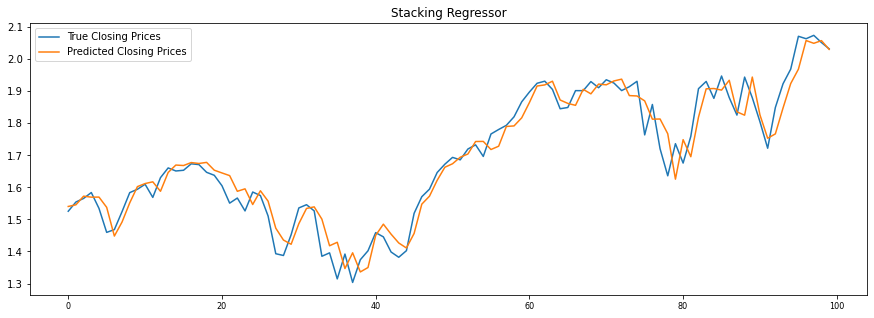

In [69]:
plt.figure(figsize=(15,5))
plt.plot(df_sr)
plt.title('Stacking Regressor')
plt.legend(['True Closing Prices', 'Predicted Closing Prices'])
plt.show()

<p>This is the best performing algorithm so far and, should we do away with the <strong>Random Forest Regressor</strong>, which seems to mix up our algorithm, then it becomes slightly better at predicting the <strong>Closing Stock Prices</strong>.</p>

<hr style="border:1px solid gray">

### E. Artificial Neural Networks (Deep Learning).
<p><strong>Artificial Neural Network</strong> (<i>ANN</i>) is an efficient computing system whose central theme is borrowed from the analogy of biological neural networks. It incorporates a set of interconnected nodes that operate in parallel at each layer of the program. Its complexity depends on the architecture that we shall provide it each time. At this time and for this rather simple problem, we shall require a simple <i>Sequential</i> model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).</p> 
<p>At this point we shall choose to use 2 layers in total (one input, one hidden) with 5 nodes each and an output layer of one value as the <i>Sequential</i> model requires. There is no need to go extravagant on this model as it is quite simple. It has only two features and around 750 observations.</p>
<p>So let us apply this model on our data and see what we come up with.</p>

In [70]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5, activation='linear'))
ann.add(tf.keras.layers.Dense(units=5, activation='linear'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
ann.compile(optimizer = 'Adam', loss = 'MeanSquaredError', metrics = ['RootMeanSquaredError'])
ann.fit(X_train, y_train, epochs = 100)
ann_pred = ann.predict(X_test)

Epoch 1/100
21/21 [==============================] - 0s 505us/step - loss: 0.2494 - root_mean_squared_error: 0.4994
Epoch 2/100
21/21 [==============================] - 0s 500us/step - loss: 0.0700 - root_mean_squared_error: 0.2645
Epoch 3/100
21/21 [==============================] - 0s 0s/step - loss: 0.0158 - root_mean_squared_error: 0.1256
Epoch 4/100
21/21 [==============================] - 0s 781us/step - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 5/100
21/21 [==============================] - 0s 781us/step - loss: 0.0021 - root_mean_squared_error: 0.0463
Epoch 6/100
21/21 [==============================] - 0s 781us/step - loss: 0.0022 - root_mean_squared_error: 0.0468
Epoch 7/100
21/21 [==============================] - 0s 781us/step - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 8/100
21/21 [==============================] - 0s 325us/step - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 9/100
21/21 [==============================] - 0s 781us/step - loss: 

In [71]:
df_ann = pd.DataFrame(y_test)
df_ann['Predictions'] = ann_pred
df_ann.columns = ['Real Values', 'Predictions']
df_ann

,Real Values,Predictions
0,1.525524,1.530244
1,1.554358,1.537506
2,1.565582,1.567688
3,1.583912,1.561201
4,1.534400,1.561157
...,...,...
95,2.071496,1.990246
96,2.063919,2.086898
97,2.074423,2.075483
98,2.051991,2.084152


<strong><i><u>Root Mean Square Error (RMSE):</u></i></strong>

In [72]:
from sklearn.metrics import mean_squared_error
rmse_ann = np.sqrt(mean_squared_error(df_ann['Real Values'], df_ann['Predictions']))
rmse_ann

0.04965235281893224

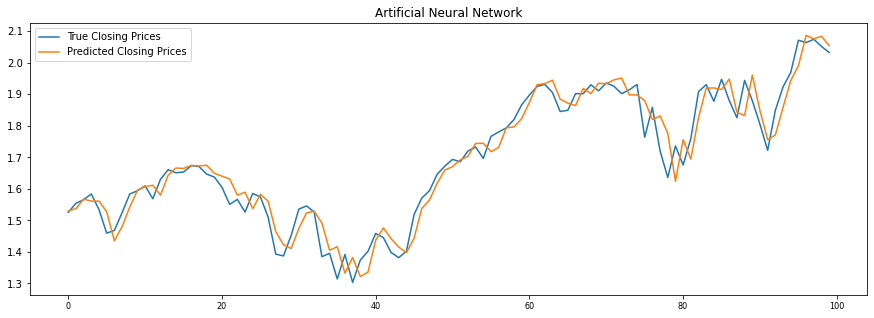

In [73]:
plt.figure(figsize=(15,5))
plt.plot(df_ann)
plt.title('Artificial Neural Network')
plt.legend(['True Closing Prices', 'Predicted Closing Prices'])
plt.show()

<p>It did pretty well. let us not forget that an optimization is involved, so the results will vary. At times this program  outperforms all the rest that we have already discussed and at others it is the second worst, right after the Random Forest Regressor. It provided us with adequate results for this setup, but there are others that could be even better inside the vast Keras API.</p>

### <u><i>Conclusion to Section 2, Exercise 1:</i></u>
<p>Let us make the following histogram to help us sum thing up:</p>

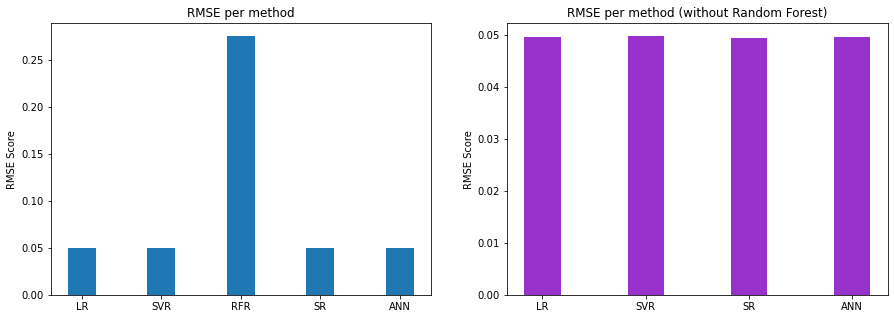

In [74]:
mylist = [rmse_lr, rmse_svr, rmse_rfr, rmse_sr, rmse_ann]
names = ['LR', 'SVR', 'RFR', 'SR', 'ANN']

mylist1 = [rmse_lr, rmse_svr, rmse_sr, rmse_ann]
names1 = ['LR', 'SVR', 'SR', 'ANN']


plt.figure(figsize = (15,5))
plt.rc('xtick', labelsize = 10)
width = 0.35

ax1 = plt.subplot(121)
ax1.bar(names, mylist, width)
ax1.set_ylabel('RMSE Score')
ax1.set_title('RMSE per method')

ax2 = plt.subplot(122)
ax2.bar(names1, mylist1, width, color='darkorchid')
ax2.set_ylabel('RMSE Score')
ax2.set_title('RMSE per method (without Random Forest)')

plt.show()

<p>In conclusion, all methods apart from the <strong>Random Forest Regressor</strong> succeeded in coming very close to predicting the real <strong>Closing Stock Prices</strong>. The best ones were the <strong>Stacked Regressor</strong> and the <strong>Artificial Neural Network</strong>, with the other two methods just behind. If we had to choose one to do this procedure all over again, then the best one would be the <strong>Stacked Regressor</strong>, because due to optimization in  <strong>Artificial Neural Network</strong>, that procedure is a bit more volatile and sometimes gives results that are a bit more off than the one we would choose. And after all, the improvement is not that significant most of the times. After all, as we can see in the bar graphs above, the differences are imperceptible and these four options in the graph to the right are quite similar to one another. Some are better than other but only by a fraction.</p>

<hr style="border: 0.5px solid #ccc">
<hr style="border: 0.5px solid #ccc">

### <u><i>2. Our Example for Classification:</i></u>
<p>The prices in our previous example were trying to be specific, but maybe a more tangible question that could get probable results would be: Can we predict whether the price of a stock shall move up or down, based on the information that we have on stock returns from previous days and the volume of the stocks?</p>
<p>Let us try and tackle this question in this exercise. For that very reason, we shall take the S&P500 (<i>GSPC</i>) for the duration of five business years (start of 2015 - end of 2019) and see if we can predict the direction at which its <strong>Adjusted Closing Price</strong> will move based on the parameters that we have already discussed.</p>

### <i>Importing the Necessary Libraries:</i>

In [75]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import datetime as dt

### <i>Getting the Data:</i>

In [76]:
ticker = '^GSPC'
start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime(2019, 12, 31)

mydata = data.DataReader(ticker, 'yahoo', start_date, end_date)
mydata

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2072.360107,2046.040039,2058.899902,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2017.339966,2054.439941,2020.579956,3799120000,2020.579956
2015-01-06,2030.250000,1992.439941,2022.150024,2002.609985,4460110000,2002.609985
2015-01-07,2029.609985,2005.550049,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2064.080078,2030.609985,2030.609985,2062.139893,3934010000,2062.139893
...,...,...,...,...,...,...
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020


<p>We shall focus on the Daily returns of the S&P500, as far as the <strong>Adjusted Closing Price</strong> is concerned, therefore:</p>

In [77]:
temp = mydata['Adj Close'].pct_change()*100 # Get the daily percent returns.
temp = temp.rename('Today')
temp = temp.reset_index()
temp

,Date,Today
0,2015-01-02,NaN
1,2015-01-05,-1.827811
2,2015-01-06,-0.889347
3,2015-01-07,1.162984
4,2015-01-08,1.788828
...,...,...
1253,2019-12-24,-0.019545
1254,2019-12-26,0.512817
1255,2019-12-27,0.003398
1256,2019-12-30,-0.578082


#### <i>Create the Lagged Columns:</i>

In [78]:
for i in range(1,6):
    temp['Lag '+str(i)] = temp['Today'].shift(i)
temp

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-1.827811,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,-0.889347,-1.827811,NaN,NaN,NaN,NaN
3,2015-01-07,1.162984,-0.889347,-1.827811,NaN,NaN,NaN
4,2015-01-08,1.788828,1.162984,-0.889347,-1.827811,NaN,NaN
...,...,...,...,...,...,...,...
1253,2019-12-24,-0.019545,0.086614,0.494478,0.445929,-0.043230,0.033529
1254,2019-12-26,0.512817,-0.019545,0.086614,0.494478,0.445929,-0.043230
1255,2019-12-27,0.003398,0.512817,-0.019545,0.086614,0.494478,0.445929
1256,2019-12-30,-0.578082,0.003398,0.512817,-0.019545,0.086614,0.494478


#### <i>Get the shifted (by one day) Volume values:</i>

In [79]:
#-----------------------------------------------------------------
# Dividing by 1.000.000.000 is making us count Volume in billions
# and plus, now we do not have to scale our data.
#-----------------------------------------------------------------
temp['Volume'] = mydata.Volume.shift(1).values/1000000000

# Dropping the NaN values.
temp = temp.dropna()
temp

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume
6,2015-01-12,-0.809369,-0.840381,1.788828,1.162984,-0.889347,-1.827811,3.36414
7,2015-01-13,-0.257856,-0.809369,-0.840381,1.788828,1.162984,-0.889347,3.45646
8,2015-01-14,-0.581307,-0.257856,-0.809369,-0.840381,1.788828,1.162984,4.10730
9,2015-01-15,-0.924788,-0.581307,-0.257856,-0.809369,-0.840381,1.788828,4.37868
10,2015-01-16,1.342420,-0.924788,-0.581307,-0.257856,-0.809369,-0.840381,4.27672
...,...,...,...,...,...,...,...,...
1253,2019-12-24,-0.019545,0.086614,0.494478,0.445929,-0.043230,0.033529,3.06061
1254,2019-12-26,0.512817,-0.019545,0.086614,0.494478,0.445929,-0.043230,1.29654
1255,2019-12-27,0.003398,0.512817,-0.019545,0.086614,0.494478,0.445929,2.16068
1256,2019-12-30,-0.578082,0.003398,0.512817,-0.019545,0.086614,0.494478,2.42867


#### <i>Create the Direction column:</i>
<p>Here if the sign of the column <i>"Today"</i> is negative, then the direction is down (or zero) and if it is positive, then the direction is up (or one).</p>

In [80]:
df = temp.copy()
df['Direction'] = [1 if i>0 else 0 for i in df['Today']]
df

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
6,2015-01-12,-0.809369,-0.840381,1.788828,1.162984,-0.889347,-1.827811,3.36414,0
7,2015-01-13,-0.257856,-0.809369,-0.840381,1.788828,1.162984,-0.889347,3.45646,0
8,2015-01-14,-0.581307,-0.257856,-0.809369,-0.840381,1.788828,1.162984,4.10730,0
9,2015-01-15,-0.924788,-0.581307,-0.257856,-0.809369,-0.840381,1.788828,4.37868,0
10,2015-01-16,1.342420,-0.924788,-0.581307,-0.257856,-0.809369,-0.840381,4.27672,1
...,...,...,...,...,...,...,...,...,...
1253,2019-12-24,-0.019545,0.086614,0.494478,0.445929,-0.043230,0.033529,3.06061,0
1254,2019-12-26,0.512817,-0.019545,0.086614,0.494478,0.445929,-0.043230,1.29654,1
1255,2019-12-27,0.003398,0.512817,-0.019545,0.086614,0.494478,0.445929,2.16068,1
1256,2019-12-30,-0.578082,0.003398,0.512817,-0.019545,0.086614,0.494478,2.42867,0


### <i>Splitting our Data into Train and Test parts:</i>
<p>In our dataset, we have a total of 1252 observations, and thus we shall use the first 1100 in order to predict the last 152.</p>

In [81]:
X = df[df.columns[2:8]] # The first two columns are not used.
y = df[df.columns[8]]

# The Feature matrix train-test split:
X_train = X[:1100] # Starts from 0.
X_test = X[1100:]

# The response vector train-test split:
y_train = y[:1100]
y_test = y[1100:]

<hr style="border:1px solid gray">

### A. Logistic Regression.
<p><strong>Logistic Regression</strong> (also called <i>Logit Regression</i>) is a probabilistic statistical classification model that predicts the probability of the occurrence  of an event. If the estimated probability is greater than 50%, then the model predicts that the observation belongs to that particular class (to the class labeled "1"), and otherwise it predicts that it does not (or to the class labeled "0"). This makes it a binary classifier. The (multiple) logistic function, in our example, can be written as:</p>
<p>$P(Y|X)=\frac{exp(\beta_0 + \beta_1X_i + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6)}{1 + exp (\beta_0 + \beta_1X_i + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6)}$</p>
<p>So let us use it and try to predict whether the price of a stock shall move up or down:</p>

In [82]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 5)
LR.fit(X_train, y_train)
logr_pred = LR.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, logr_pred)
print(cm)
logr_score = accuracy_score(y_test, logr_pred)
logr_score

[[10 52]
 [ 5 85]]


0.625

<p>Not bad. Prediction, especially in the stock market, is a very challenging task, so to be able to get even that kind of accuracy is good enough. In total, 57 observations are misclassified, but 95 get right where they belong.</p>

<hr style="border:1px solid gray">

### B. K-Nearest Neighbours.
<p>Yet another famous methodology, is the <strong>K-Nearest Neighbors</strong> (<i>K-NN</i>) classification methodology. What it does, is it identifies a group of <i>K</i> objects in the training set that are closest to the test object and assigns a label based on the most dominant class in this neighborhood. So for example if we have chosen a neighbourhood of five objects and three of them were labeled as 1, then the new observation would also be labelled as 1.</p>
<p>The basic idea is that if we want to predict the value of a new observation we look for observations similar to this one and we use as predictors their values (or a function of them). Specifically, for classification problems as ours, we use the mode of the classes of the nearest data.</p>
<p>So without further ado, let us see how well <strong>K-Nearest Neighbors</strong>​ algorithm predicts our classes.</p>

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, knn_pred)
print(cm)
knn_score = accuracy_score(y_test, knn_pred)
knn_score

[[37 25]
 [41 49]]


0.5657894736842105

<p>Again, not bad. Even though it has a worse accuracy than <strong>Logistic Regression</strong> before it, it is still trying its best to classify a difficult problem. Here the result was dependent on two things: the distance metric we used and the number of neighbours we used, thus there might be better solutions, but this one was the best we could come up with.</p>

<hr style="border:1px solid gray">

### C. Naive Bayes.
<p>Naive Bayes is a simple probabilistic classifier that applies Bayes’ theorem with strong (naive) assumption of independence, such that the presence of an individual feature of a class is unrelated to the presence of another feature.</p>
<p>Assume that input features $x_1$, $x_2$, ..., $x_n$, are conditionally independent of each other, given the class label $Y$, such that:</p>
<p>$P(x_1,x_2,...,x_n|Y)=\prod_{i=1}^{n}P(x_i|Y)$</p>
<p>Therefore, if we only had two classes, like in our problem, then we would define $P(i|x)$, for $i=0,1$ as the probability that measurement vector $x=\{x_1, x_2, ..., x_n\}$ belongs to class $i$. While the classification score would be defined as:</p>
<p>$\frac{P(1|x)}{P(0|x)}=\frac{\prod_{i=1}^{n}f(x_i|1)P(1)}{\prod_{i=1}^{n}f(x_i|0)P(0)}=\frac{P(1)}{P(0)}\prod_{i=1}^{n}\frac{f(x_i|1)}{f(x_i|0)}$</p>
<p>The naive Bayes model is surprisingly effective and immensely appealing, owing to its simplicity and robustness. Because this algorithm does not require application of complex iterative parameter estimation schemes to large datasets, it is very useful and relatively easy to construct and use. It's somewhat similar to <strong>K-Nearest Neighbors</strong> in the sense that it makes some assumptions that might oversimplify reality, but still, it performs well in many cases.</p>
<p>Thus, let us apply this algorithm and see what we get.</p>

In [86]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_pred = NB.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, nb_pred)
print(cm)
nb_score = accuracy_score(y_test, nb_pred)
nb_score

[[40 22]
 [51 39]]


0.5197368421052632

This result is a bit worse than the previous two, as 73 observations get misclassified. Having the other two options, maybe we would not choose this one as a classifier for this problem. After all, <strong>Naive Bayes</strong> works best for large datasets, but the "naive" assumption that the variables are independent does not work well here, because we have lagged variables.

<hr style="border:1px solid gray">

### D. Support Vector Machine.
<p><strong>Support Vector Machine</strong> is a powerful, highly flexible modeling technique. It classifies the data by finding the hyperplane (meaning an <i>n – 1</i> subspace in an <i>n</i>-dimensional space) that maximizes the margin between the classes in the training data. In two dimensions, for example, the hyperplane is a line that separates the data. Thus, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class.</p>
<p>Let us see then, how well it separates our data.</p>

In [88]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, svm_pred)
print(cm)
svm_score = accuracy_score(y_test, svm_pred)
svm_score

[[ 0 62]
 [ 0 90]]


0.5921052631578947

<p>Not bad at all. This is the second-best result so far accuracy-wise, right after <strong>Logistic Regression</strong>. It should be mentioned that other <i>kernels</i> performed even worse than the <i>linear</i> so it really was the best that we could do.</p>

<hr style="border:1px solid gray">

### E. Random Forest Classification.
<p>We have already mentioned this technique in the previous exercise, but let us repeat how this procedure works once again. <strong>Random Forest</strong> is an ensemble learning approach for classification, in which “weak learners” collaborate to form “strong learners,” using a large collection of decorrelated decision trees (the random forest). Instead of developing a solution based on the output of a single deep tree, however, random forest aggregates the output from a number of shallow trees, forming an additional layer to bagging. Bagging constructs n predictors, using independent successive trees, by bootstrapping samples of the dataset. The n predictors are combined to solve a classification or estimation problem through averaging. Although individual classifiers are weak learners, all the classifiers combined form a strong learner.</p>
<p>Let us see how it handles our data.</p>

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rf_pred)
print(cm)
rf_score = accuracy_score(y_test, rf_pred)
rf_score

[[29 33]
 [39 51]]


0.5263157894736842

<p>Not bad, not good. It has an okay predictive power, based on the accuracy of the confusion matrix. It is dependent on the number of decision trees we choose to apply in total and the criterion we choose to measure the quality of a split. So changing all those parameters could make our algorithm better or worse.</p>

<hr style="border:1px solid gray">

### F. Artificial Neural Networks.
<p>Here we will repeat what we already said about this procedure in <strong><i>Exercise 1</i></strong>.</p>
<p><strong>Artificial Neural Network</strong> (<i>ANN</i>) is an efficient computing system whose central theme is borrowed from the analogy of biological neural networks. It incorporates a set of interconnected nodes that operate in parallel at each layer of the program. Its complexity depends on the architecture that we shall provide it each time. At this time and for this rather simple problem, we shall require a simple <i>Sequential</i> model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).</p> 
<p>At this point we shall choose to use 2 layers in total (one input, one hidden) with 5 nodes each and an output layer of one value as the <i>Sequential</i> model requires. Since this is a simple classification, the output layer will be a <i>sigmoid</i> function.</p>
<p>So let us apply this model on our data and see what we come up with.</p>

In [92]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)
ann_pred = ann.predict(X_test)
ann_pred = np.round(ann_pred)

Epoch 1/200
35/35 [==============================] - 1s 919us/step - loss: 0.6984 - accuracy: 0.5109
Epoch 2/200
35/35 [==============================] - 0s 651us/step - loss: 0.6971 - accuracy: 0.5045
Epoch 3/200
35/35 [==============================] - 0s 460us/step - loss: 0.6965 - accuracy: 0.5182
Epoch 4/200
35/35 [==============================] - 0s 459us/step - loss: 0.6958 - accuracy: 0.5300
Epoch 5/200
35/35 [==============================] - 0s 919us/step - loss: 0.6953 - accuracy: 0.5300
Epoch 6/200
35/35 [==============================] - 0s 651us/step - loss: 0.6950 - accuracy: 0.5300
Epoch 7/200
35/35 [==============================] - 0s 919us/step - loss: 0.6942 - accuracy: 0.5300
Epoch 8/200
35/35 [==============================] - 0s 459us/step - loss: 0.6937 - accuracy: 0.5300
Epoch 9/200
35/35 [==============================] - 0s 459us/step - loss: 0.6933 - accuracy: 0.5300
Epoch 10/200
35/35 [==============================] - 0s 651us/step - loss: 0.6929 - accura

35/35 [==============================] - 0s 651us/step - loss: 0.6851 - accuracy: 0.5300
Epoch 161/200
35/35 [==============================] - 0s 460us/step - loss: 0.6852 - accuracy: 0.5300
Epoch 162/200
35/35 [==============================] - 0s 459us/step - loss: 0.6852 - accuracy: 0.5300
Epoch 163/200
35/35 [==============================] - 0s 919us/step - loss: 0.6851 - accuracy: 0.5300
Epoch 164/200
35/35 [==============================] - 0s 651us/step - loss: 0.6854 - accuracy: 0.5300
Epoch 165/200
35/35 [==============================] - 0s 919us/step - loss: 0.6850 - accuracy: 0.5300
Epoch 166/200
35/35 [==============================] - 0s 459us/step - loss: 0.6852 - accuracy: 0.5300
Epoch 167/200
35/35 [==============================] - 0s 919us/step - loss: 0.6851 - accuracy: 0.5300
Epoch 168/200
35/35 [==============================] - 0s 651us/step - loss: 0.6849 - accuracy: 0.5300
Epoch 169/200
35/35 [==============================] - 0s 919us/step - loss: 0.6849 - a

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ann_pred)
print(cm)
ann_score = accuracy_score(y_test, ann_pred)
ann_score

[[ 0 62]
 [ 0 90]]


0.5921052631578947

<p>Not bad, but also not the best. This procedure does have an optimization to it and so will give us different answers at different runs. Still no matter how many runs we had, it never surpassed the accuracy of our best model, the <strong>Logistic Regression</strong>.</p>

### <u><i>Conclusion to Section 2, Exercise 2:</i></u>
<p>Let us do another barchart in order to make this synopsis easier.</p>

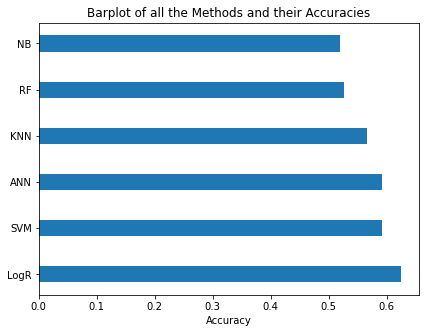

In [94]:
mylist = [logr_score, svm_score, ann_score, knn_score, rf_score, nb_score]
names = ['LogR', 'SVM', 'ANN', 'KNN', 'RF', 'NB']


plt.figure(figsize = (15,5))
plt.rc('xtick', labelsize = 10)
width = 0.35

ax1 = plt.subplot(121)
ax1.barh(names, mylist, width)
ax1.set_xlabel('Accuracy')
ax1.set_title('Barplot of all the Methods and their Accuracies')
plt.show()

<p>We saw that even predicting the direction at which a stock shall move the next day can be a difficult task to tackle. The worst technique proved to be <strong>Naive Bayes</strong>, however it was for understandable reasons, as we discussed in the final comments of that method. Out of all the methods used, the <strong>Logistic Regression</strong> gave the most promising results, even though they were not perfect. Still, it would be the technique we would use in such a problem, because it outperformed all others.</p>

## <u><i>References</i></u>
<ul>
    <li>Albon Chris. "Machine Learning with Python Cookbook Practical Solutions from Preprocessing to Deep Learning". O’Reilly Media (2018).</li>
    <li>Avila Julian and Hauck Trent. "Scikit-Learn Cookbook Over 80 Recipes for Machine Learning in Python With Scikit-Learn". 2nd Revised edition. Packt Publishing Ltd (2017).</li>
    <li>James Gareth, Witten Daniela, Hastie Trevor and Tibshirani Robert. "An Introduction to Statistical Learning with Applications in R". Springer Science & Business Media (2021).</li>
    <li>Ester, Martin, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu. “A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise.” KDD (1996).</li>
    <li>Hastie Trevor, Tibshirani Robert and Jerome Friedman. "The Elements of Statistical Learning: Data Mining, Inference, and Prediction". Springer (2013).</li>
    <li>Géron Aurélien. "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems". O’Reilly Media (2019).</li>
    <li>Kuhn Max and Johnson Kjell. "Applied Predictive Modeling". Springer (2013).</li>
    <li>Awad Mariette and Khanna Rahul. "Efficient Learning Machines: Theories, Concepts, and Applications for Engineers and System Designers". 1st Edition. Apress (2015)</li>
    <li>Wolpert David H. "Stacked generalization". Neural networks 5.2 (1992): 241-259.</li>
</ul>